In [1]:
import modules.Analyser.Analyser as an
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
from ast import literal_eval
data = pd.read_csv("data/movies_metadata.csv")
# data = data[data['original_language']]
data = data[['budget', 'genres','id', 'imdb_id','original_title', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count', 'original_language', 'production_companies']]
data = data[(data['genres'] != "[]")]
data['genres'] = data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
data.dropna(inplace=True)
data = data[(data.T != 0).all()]
data['profit'] = data['revenue'] - data['budget']
data.head()

,budget,genres,id,imdb_id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,original_language,production_companies,profit
0,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,Toy Story,21.946943,30/10/1995,373554033.0,81.0,7.7,5415.0,en,"[{'name': 'Pixar Animation Studios', 'id': 3}]",343554033.0
1,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,Jumanji,17.015539,15/12/1995,262797249.0,104.0,6.9,2413.0,en,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",197797249.0
3,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,Waiting to Exhale,3.859495,22/12/1995,81452156.0,127.0,6.1,34.0,en,[{'name': 'Twentieth Century Fox Film Corporat...,65452156.0
5,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,tt0113277,Heat,17.924927,15/12/1995,187436818.0,170.0,7.7,1886.0,en,"[{'name': 'Regency Enterprises', 'id': 508}, {...",127436818.0
8,35000000.0,"[Action, Adventure, Thriller]",9091.0,tt0114576,Sudden Death,5.231580,22/12/1995,64350171.0,106.0,5.5,174.0,en,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",29350171.0


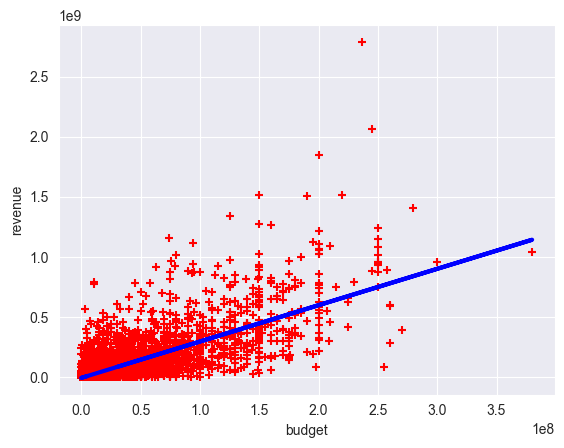

In [2]:
an.linear_regression_func(data,'budget','revenue')

In [3]:
an.revenue_predict(data,'budget','revenue',3000000)

array([5451651.53493022])

In [4]:
an.correlator(data, 'budget','revenue')

Correlation between budget and revenue is:  0.7299137384488268


C:\Users\ch__s\OneDrive\Documents\Datamatiker cph business\4th semester\python\Exam project\MovieMatch\modules\Analyser\Analyser.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


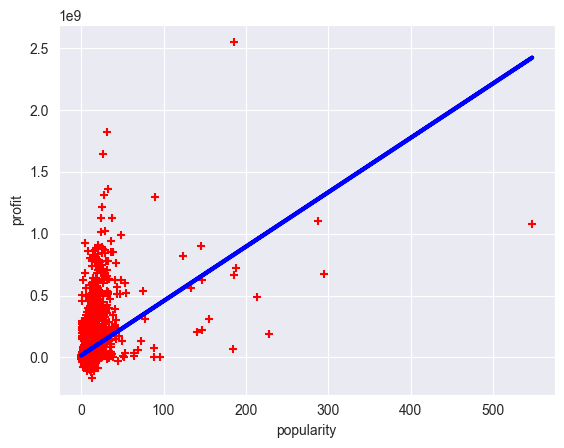

In [5]:
an.linear_regression_func(data,'popularity','profit')

C:\Users\ch__s\OneDrive\Documents\Datamatiker cph business\4th semester\python\Exam project\MovieMatch\modules\Analyser\Analyser.py:32: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'])


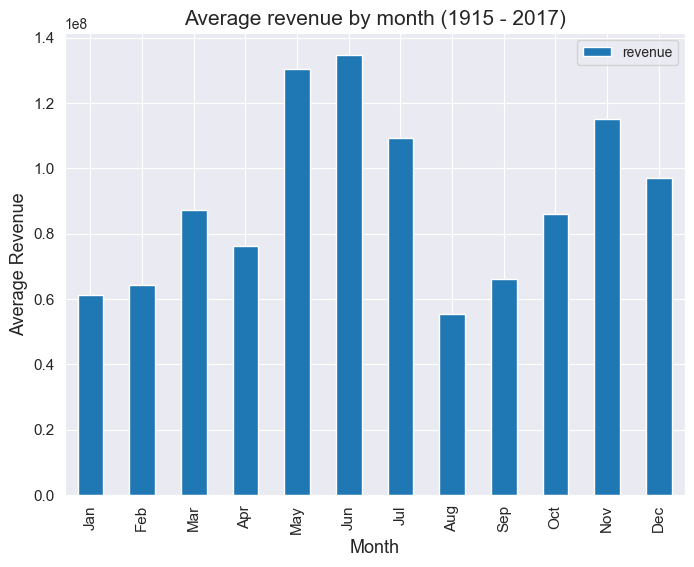

In [6]:
an.average_revenue_by_month(data)

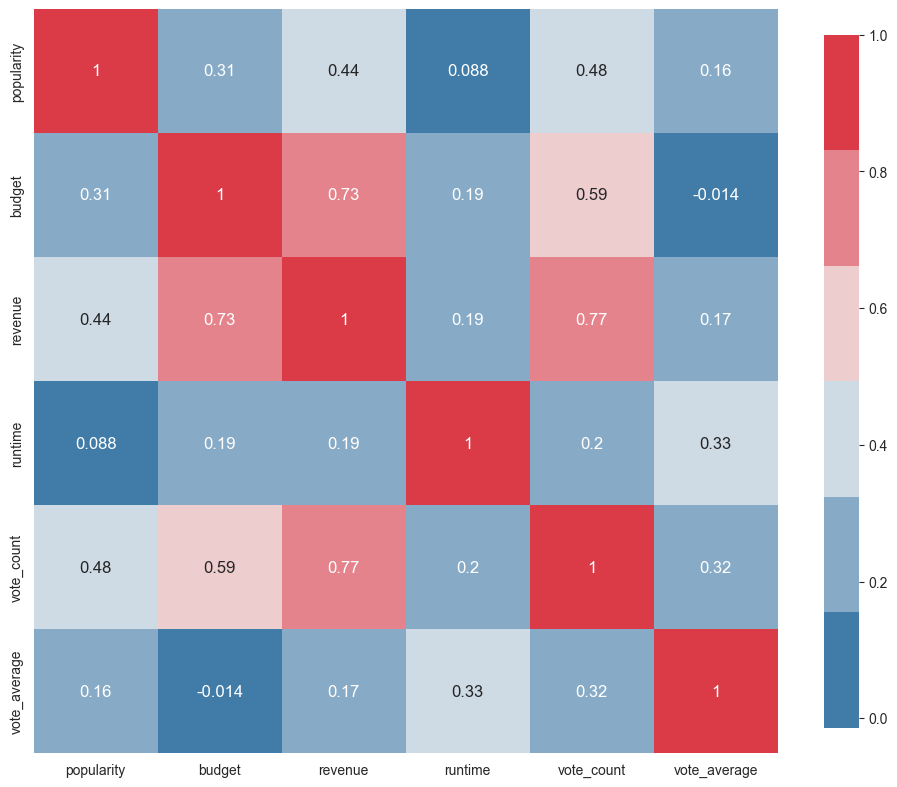

In [7]:
an.plot_correlation_map(data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

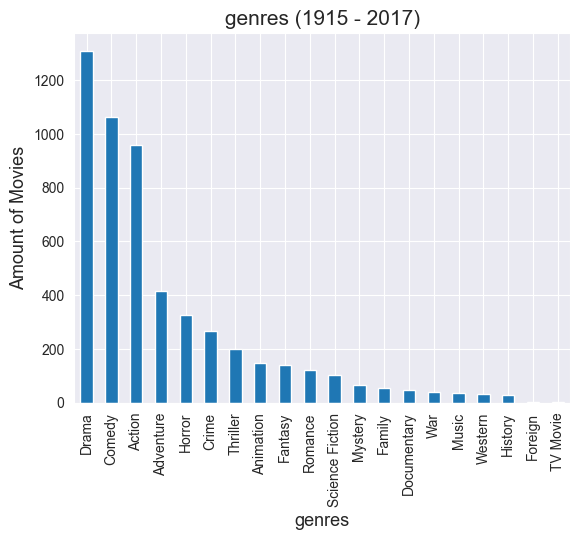

In [8]:
an.plot_genre(data,'genres')

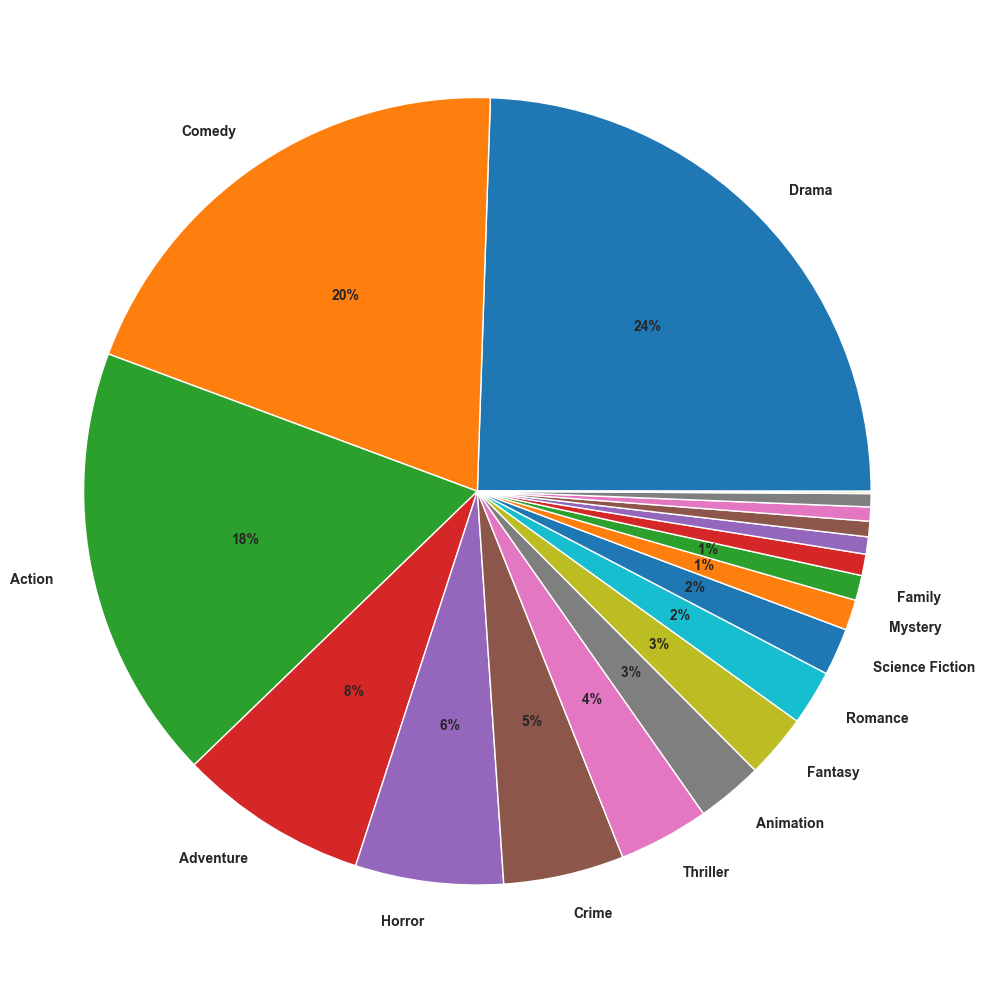

In [9]:
an.plot_genre_pie(data, 'genres')